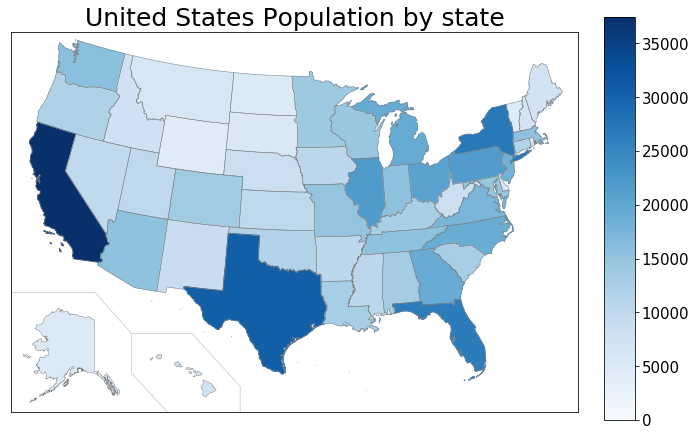

In [3]:
'''
This code is the map of population distribution using basemap toolkit. 
All the parameters are fixedly setted
Author : Jiawei Yin
'''
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

#fig, ax = plt.subplots()
fig= plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,resolution='l',
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,resolution='l',
            projection='merc',lat_ts=20)  # do not change these numbers

#%% ---------   draw state boundaries  ----------------------------------------
## data from U.S Census Bureau
## http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='gray')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

## population density by state from
## http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
popdensity = {
'New Jersey':  8791,
'Rhode Island':   1052,
'Massachusetts':   6547,
'Connecticut':	  3574,
'Maryland':   5773,
'New York':    19378,
'Delaware':    897,
'Florida':     18801,
'Ohio':  11536,
'Pennsylvania':	 12702,
'Illinois':    12830,
'California':  37254,
'Hawaii':  1360,
'Virginia':    8001,
'Michigan':    9883,
'Indiana':    6483,
'North Carolina':  9535,
'Georgia':     9687,
'Tennessee':   6346,
'New Hampshire':   1316,
'South Carolina':  4625,
'Louisiana':   4533,
'Kentucky':   4339,
'Wisconsin':  5686,
'Washington':  6724,
'Alabama':     4779,
'Missouri':    5988,
'Texas':   25145,
'West Virginia':   1852,
'Vermont':     625,
'Minnesota':  5303,
'Mississippi':	 2967,
'Iowa':	 3046,
'Arkansas':    2915,
'Oklahoma':    3751,
'Arizona':     6392,
'Colorado':    5029,
'Maine':  1328,
'Oregon':  3831,
'Kansas':  2853,
'Utah':	 2763,
'Nebraska':    1826,
'Nevada':  2700,
'Idaho':   1567,
'New Mexico':  2059,
'South Dakota':	 814,
'North Dakota':	 672,
'Montana':     989,
'Wyoming':      563,
'Alaska':     710}

#%% -------- choose a color for each state based on population density. -------
colors={}
statenames=[]
cmap = plt.cm.hot_r # use 'reversed hot' colormap
vmin = 0; vmax = 37500 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        cmap = plt.get_cmap('Blues')
        colors[statename] = cmap(np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000   # via manual trial and error, thus changing them is not recommended.)

for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='grey', linewidth=.45)
        ax.add_patch(poly)
ax.set_title('United States Population by state',fontsize=25)
#ax.annotate('CA', xy=(0.066, 0.56), xycoords='axes fraction')
#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

#%% ---------   Show color bar  ---------------------------------------
ax_c = fig.add_axes([0.82, 0.11, 0.03, 0.8])
cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation='vertical')
#                  label=r'[population number(units: ten thousand)]')
plt.yticks(fontsize=15)
plt.savefig('population distribution.png')
plt.show()


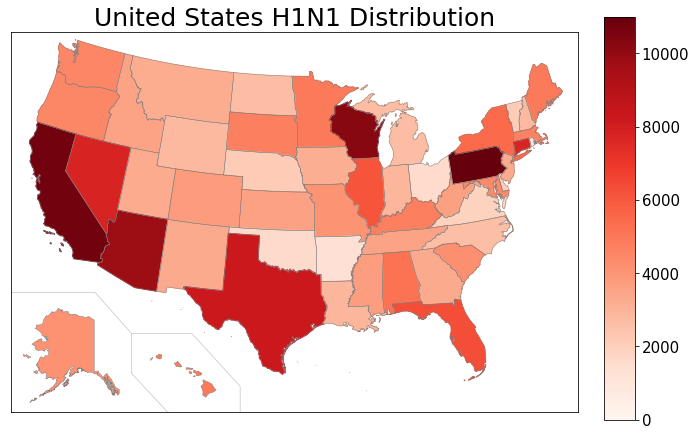

In [4]:
'''
This code is the map of H1N1 distribution using basemap toolkit. 
All the parameters are fixedly setted
Author : Jiawei Yin
'''

from __future__ import (absolute_import, division, print_function)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

fig= plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
#fig, ax = plt.subplots()

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,resolution='h',
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,resolution='h',
            projection='merc',lat_ts=20)  # do not change these numbers

#%% ---------   draw state boundaries  ----------------------------------------
## data from U.S Census Bureau
## http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='gray')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

## population density by state from
## http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
popdensity = {
'New Jersey':  1006,
'Rhode Island':   203,
'Massachusetts':   1979,
'Connecticut':     5491,
'Maryland':   1772,
'New York':    2738,
'Delaware':    381,
'Florida':     3676,
'Ohio':  227,
'Pennsylvania':  10940,
'Illinois':    3387,
'California':  10545,
'Hawaii':  2221,
'Virginia':    327,
'Michigan':    655,
'Indiana':    782,
'North Carolina':  638,
'Georgia':     1012,
'Tennessee':   1163,
'New Hampshire':   722,
'South Carolina':  1634,
'Louisiana':   782,
'Kentucky':   2092,
'Wisconsin':  9579,
'Washington':  1882,
'Alabama':     2453,
'Missouri':    1523,
'Texas':   6128,
'West Virginia':   1214,
'Vermont':     404,
'Minnesota':  2220,
'Mississippi':  1292,
'Iowa':	 929,
'Arkansas':    154,
'Oklahoma':    237,
'Arizona':     8726,
'Colorado':    1321,
'Maine':  2232,
'Oregon':  1833,
'Kansas':  1201,
'Utah':	 988,
'Nebraska':    430,
'Nevada':  5516,
'Idaho':   1171,
'New Mexico':  1007,
'South Dakota':  2081,
'North Dakota':  650,
'Montana':     961,
'Wyoming':     725,
'Alaska':     1563}

#%% -------- choose a color for each state based on population density. -------
colors={}
statenames=[]
cmap = plt.cm.hot_r # use 'reversed hot' colormap
vmin = 0; vmax = 11000 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        cmap = plt.get_cmap('Reds')
        colors[statename] = cmap(np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000   # via manual trial and error, thus changing them is not recommended.)

for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)
ax.set_title('United States H1N1 Distribution',fontsize=25)
#ax.annotate('CA', xy=(0.066, 0.56), xycoords='axes fraction')
#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

#%% ---------   Show color bar  ---------------------------------------
ax_c = fig.add_axes([0.82, 0.11, 0.03, 0.8])
cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation='vertical')
#                  label=r'[number of infected persons]')
plt.yticks(fontsize=15)
plt.savefig('H1N1 distribution.png')
plt.show()

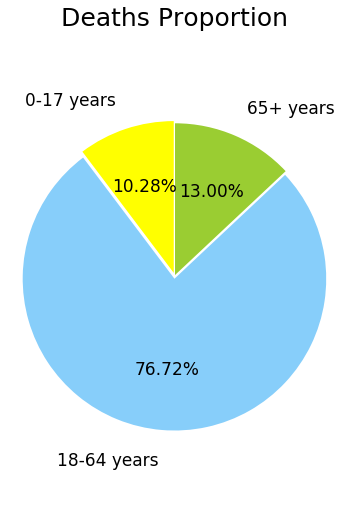

In [5]:
'''
This pie chart shows the death proportion 
Author: Jiawei Yin
'''

import numpy as np
import matplotlib.pyplot as plt

#adjust the size of figure
plt.figure(figsize=(6,9)) 
#define label
labels = ['0-17 years','18-64 years','65+ years']
sizes = [1282,9565,1621] 
colors = ['yellow','lightskyblue','yellowgreen']
#The larger the value is, the larger the gap is
explode = (0.02,0.02,0.005) 
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      labeldistance = 1.2,
                      autopct = '%3.2f%%', 
                      shadow = False, 
                      startangle =90, 
                      pctdistance = 0.6) 
for t in text1:
    t.set_size(17)
for t in text2:
    t.set_size(17)

#x,y is consistent so ensure it's a circle
plt.axis('equal')
#plt.legend()
plt.title('Deaths Proportion',fontsize=25)
plt.show()

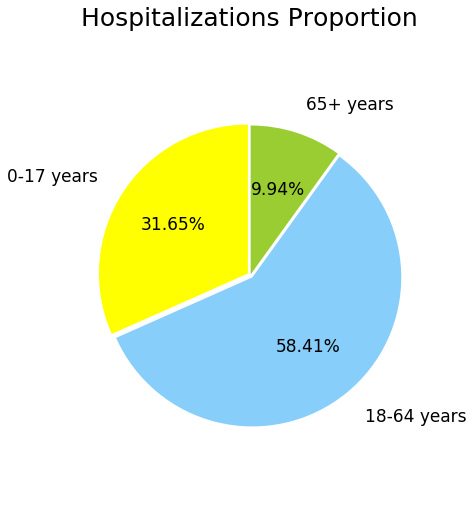

In [6]:
'''
This pie chart shows the hospitalization proportion 
Author: Jiawei Yin
'''

import numpy as np
import matplotlib.pyplot as plt 
#adjust the size of figure
plt.figure(figsize=(6,9))
#define label
labels = ['0-17 years','18-64 years','65+ years'] 
sizes = [86813,160229,27263] 
#The larger the value is, the larger the gap is
colors = ['yellow','lightskyblue','yellowgreen'] 
explode = (0.02,0.02,0.005) 
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      labeldistance = 1.2,
                      autopct = '%3.2f%%', 
                      shadow = False, 
                      startangle =90, 
                      pctdistance = 0.6) 
for t in text1:
    t.set_size(17)
for t in text2:
    t.set_size(17)

#x,y is consistent so ensure it's a circle
plt.axis('equal')
#plt.legend()
plt.title('Hospitalizations Proportion',fontsize=25)
plt.show()

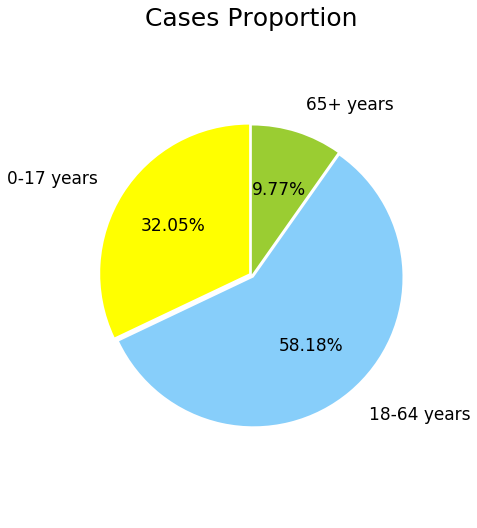

In [7]:
'''
This pie chart shows the hospitalization proportion 
Author: Jiawei Yin
'''
import numpy as np
import matplotlib.pyplot as plt 

#adjust the size of figure
plt.figure(figsize=(6,9)) 
#define label
#labels = ['0-17 years','18-64 years','65+ years']
sizes = [19501004,35392931,5943813]
colors = ['yellow','lightskyblue','yellowgreen'] 
explode = (0.02,0.02,0.005) 
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      labeldistance = 1.2,
                      autopct = '%3.2f%%', 
                      shadow = False, 
                      startangle =90, 
                      pctdistance = 0.6) 
for t in text1:
    t.set_size(17)
for t in text2:
    t.set_size(17)

#x,y is consistent so ensure it's a circle
plt.axis('equal')
#plt.legend()
plt.title('Cases Proportion',fontsize=25)
plt.show()

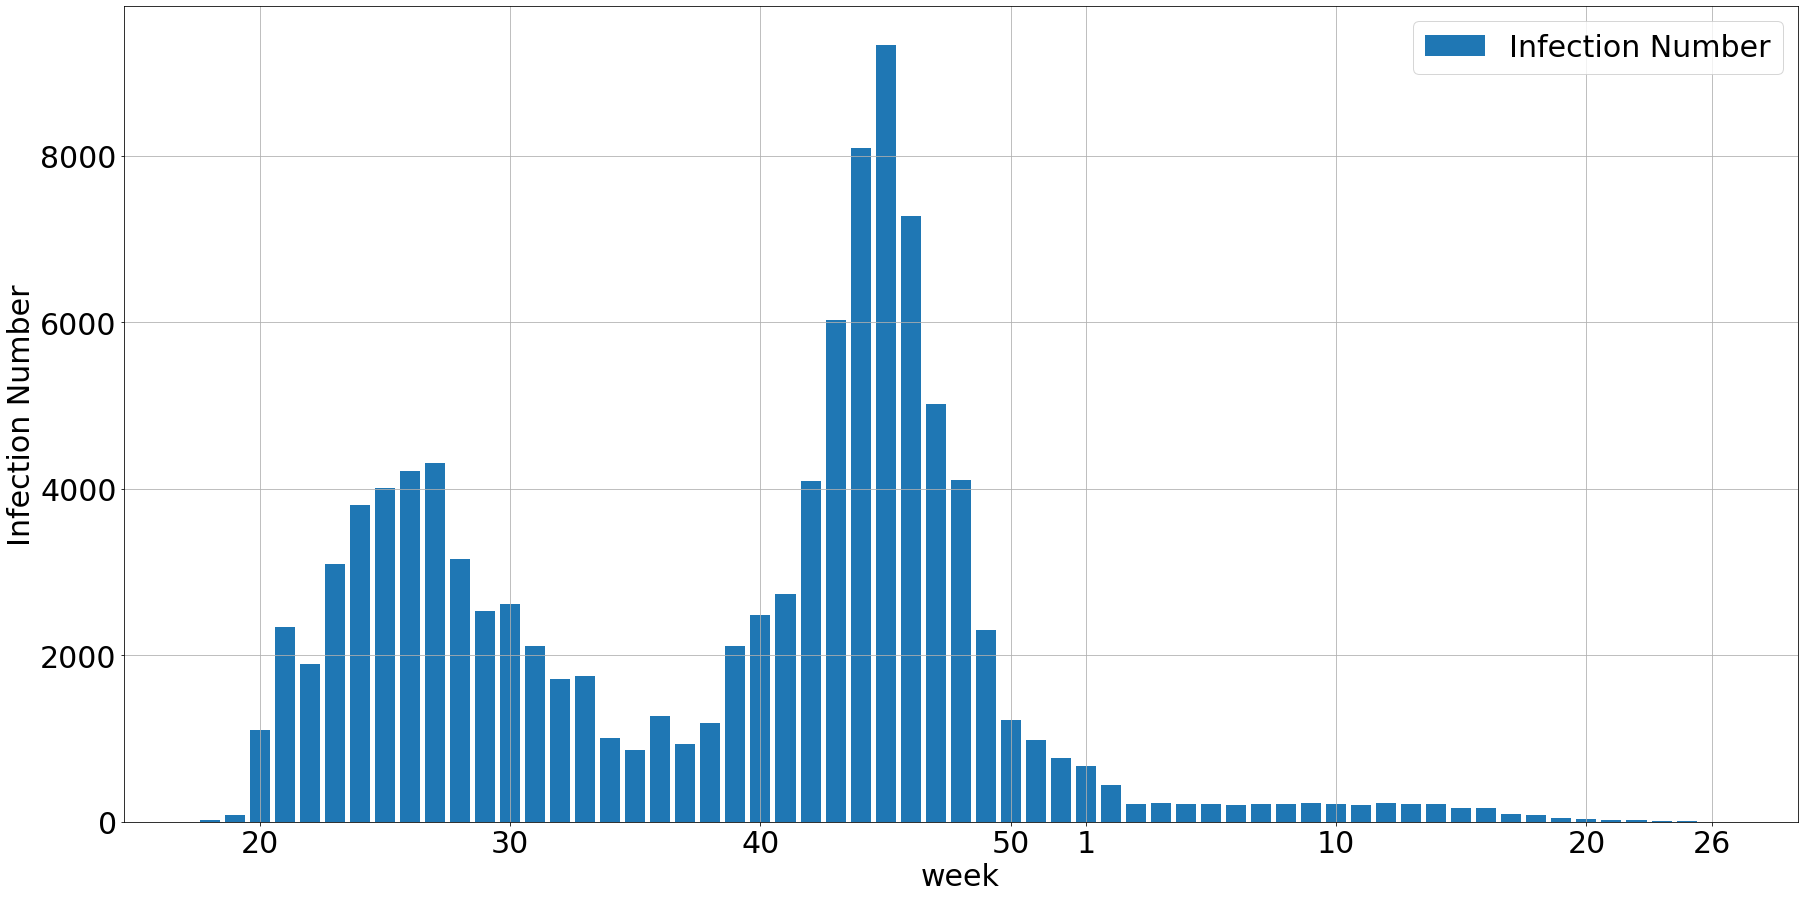

In [9]:
'''
This column chart depict the infection number along with the timeline 
Author: Jiawei Yin
'''

import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd

data=pd.read_csv("data.csv",header=None)
list=data.values.tolist()
#print(list)
#print(list[0])
#print(list[0])
#print(list[1]+list[2])
#print(len(list))
plt.figure(figsize=(30,15))
plt.bar(list[0],list[1])
plt.xlabel("week",fontsize = 30)
plt.ylabel("Infection Number",fontsize = 30)
#plt.title('H1N1 weekly infection',fontsize = 15)
#plt.xticks([18.19,20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78],[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
plt.xticks([20,30,40,50,53,63,73,78],[20,30,40,50,1,10,20,26],fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid()
plt.legend(('Infection Number',),fontsize=30)
plt.savefig('timeline.png')
plt.show()


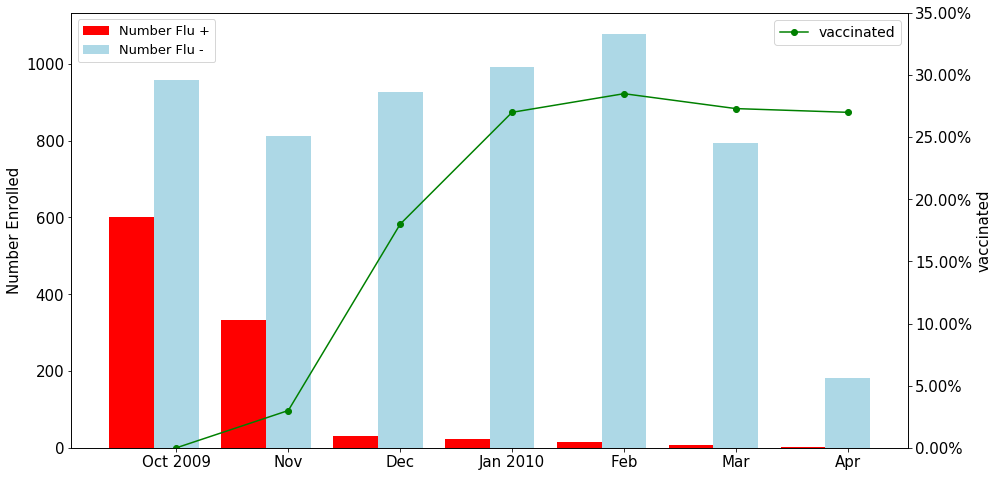

In [10]:
'''
This code draws the number of people who tested positive/negative and the percentage of people who vaccined
Author: Jiawei Yin

'''

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

#construct data
name_list = ['Oct 2009','Nov','Dec','Jan 2010','Feb','Mar','Apr']
#histgram data
num_list = [601,333,30,23,16,6,2]
num_list1 = [959,812,928,993,1079,793,182]
#line chart data
num_list2 = [0,3,18,27,28.5,27.3,27]

x =([i for i in range(7)])



total_width, n = 0.8, 2
width = total_width / n

fig= plt.figure(figsize=(15,8))
#subplots()
ax1 = fig.add_subplot(111)
ax1.bar(x, num_list, width=width, label='Number Flu +',fc = 'red')
for i in range(len(x)):
    x[i] = x[i] + width
ax1.bar(x, num_list1, width=width, label='Number Flu -',tick_label = name_list,fc = 'lightblue')
ax1.set_ylabel('Number Enrolled',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax2 = ax1.twinx()

fmt='%.2f%%'
yticks = mtick.FormatStrFormatter(fmt)
 
ax2.plot(x, num_list2,'og-',label='vaccinated');
ax2.yaxis.set_major_formatter(yticks)
ax2.set_ylim([0, 35]);
ax2.set_ylabel('vaccinated',fontsize=15);

ax1.legend(loc=2,fontsize=13)
ax2.legend(loc=1,fontsize=14)

plt.yticks(fontsize=15)
plt.savefig('figure1.png')
plt.show()